In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import numpy as np
import random

In [2]:
cd "D://Spring 2019//EE 257//prjt//dataset_two_gas_sources_//dataset_twosources_downsampled//"

D:\Spring 2019\EE 257\prjt\dataset_two_gas_sources_\dataset_twosources_downsampled


In [3]:
threshEthylene = 593 #gas is released after this instant

In [4]:
#High Ethylene Concentration with no CO concentration

dfEtyH0 = pd.read_csv('000_Et_H_CO_n', header = None)
dfEtyH1 = pd.read_csv('032_Et_H_CO_n', header = None)
dfEtyH2 = pd.read_csv('066_Et_H_CO_n', header = None)
dfEtyH3 = pd.read_csv('098_Et_H_CO_n', header = None)
dfEtyH4 = pd.read_csv('132_Et_H_CO_n', header = None)
dfEtyH5 = pd.read_csv('164_Et_H_CO_n', header = None)

X_H = pd.concat([dfEtyH0.drop(range(threshEthylene), axis =0), dfEtyH1.drop(range(threshEthylene), axis =0), dfEtyH2.drop(range(threshEthylene), axis =0),dfEtyH3.drop(range(threshEthylene), axis =0),dfEtyH4.drop(range(threshEthylene), axis =0), dfEtyH5.drop(range(threshEthylene), axis =0)], ignore_index=True)
X_H[11]=2
y_H=X_H[11]
del X_H[0]
del X_H[11]


In [5]:
#010_Et_M_CO_n  044_Et_M_CO_n  076_Et_M_CO_n  110_Et_M_CO_n  142_Et_M_CO_n  176_Et_M_CO_n
#Medium Ethylene Concentration with no CO concentration

dfEtyM0 = pd.read_csv('010_Et_M_CO_n', header = None)
dfEtyM1 = pd.read_csv('044_Et_M_CO_n', header = None)
dfEtyM2 = pd.read_csv('076_Et_M_CO_n', header = None)
dfEtyM3 = pd.read_csv('110_Et_M_CO_n', header = None)
dfEtyM4 = pd.read_csv('142_Et_M_CO_n', header = None)
dfEtyM5 = pd.read_csv('176_Et_M_CO_n', header = None)

X_M = pd.concat([dfEtyM0.drop(range(threshEthylene), axis =0), dfEtyM1.drop(range(threshEthylene), axis =0), dfEtyM2.drop(range(threshEthylene), axis =0),dfEtyM3.drop(range(threshEthylene), axis =0),dfEtyM4.drop(range(threshEthylene), axis =0), dfEtyM5.drop(range(threshEthylene), axis =0)], ignore_index=True)
X_M[11]=1
y_M = X_M[11]
del X_M[0]
del X_M[11]

In [6]:
#014_Et_L_CO_n  042_Et_L_CO_n  048_Et_L_CO_n  080_Et_L_CO_n  114_Et_L_CO_n  146_Et_L_CO_n
#Low Ethylene Concentration with no CO concentration

dfEtyL0 = pd.read_csv('014_Et_L_CO_n', header = None)
dfEtyL1 = pd.read_csv('042_Et_L_CO_n', header = None)
dfEtyL2 = pd.read_csv('048_Et_L_CO_n', header = None)
dfEtyL3 = pd.read_csv('080_Et_L_CO_n', header = None)
dfEtyL4 = pd.read_csv('114_Et_L_CO_n', header = None)
dfEtyL5 = pd.read_csv('146_Et_L_CO_n', header = None)

X_L = pd.concat([dfEtyL0.drop(range(threshEthylene), axis =0), dfEtyL1.drop(range(threshEthylene), axis =0), dfEtyL2.drop(range(threshEthylene), axis =0),dfEtyL3.drop(range(threshEthylene), axis =0),dfEtyL4.drop(range(threshEthylene), axis =0), dfEtyL5.drop(range(threshEthylene), axis =0)], ignore_index=True)
X_L[11]=0
y_L = X_L[11]
del X_L[0]
del X_L[11]


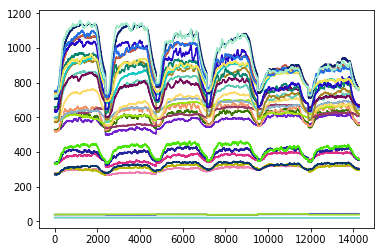

In [7]:
for i in range(10):
    plt.plot( X_L.iloc[:,i], color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)))
    plt.plot( X_M.iloc[:,i], color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)))
    plt.plot( X_H.iloc[:,i], color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)))

In [8]:
#Spliting train and test data without shuffling

split_value=1000

X_train=pd.concat([X_H[:split_value], X_M[:split_value], X_L[:split_value]], ignore_index=True)
X_test=pd.concat([X_H[split_value:], X_M[split_value:], X_L[split_value:]], ignore_index=True)
y_train=pd.concat([y_H[:split_value], y_M[:split_value], y_L[:split_value]], ignore_index=True)
y_test=pd.concat([y_H[split_value:], y_M[split_value:], y_L[split_value:]], ignore_index=True)


#y_train = y_train.map({'Ethylene':0, 'Methane':1, 'CO':2})
#y_test = y_test.map({'Ethylene':0, 'Methane':1, 'CO':2})


In [9]:
#normalizing X data
from sklearn import preprocessing

x = X_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train = pd.DataFrame(x_scaled)

x = X_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_test = pd.DataFrame(x_scaled)


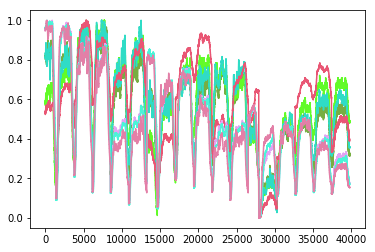

In [10]:
for i in range(2,9):
    plt.plot( X_test.iloc[:,i], color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)))


In [11]:
X_train.columns = ['Temperature', 'RelativeHumidity', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8']
X_test.columns = ['Temperature', 'RelativeHumidity', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8']

In [20]:
import pandas as pd
import numpy as np
import pydotplus  # Check the references if you need help to install this module.
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.tree import DecisionTreeClassifier, export_graphviz  # References: download link and instructions to install Graphviz.
from IPython.display import Image  # To plot decision tree.
from sklearn.externals.six import StringIO  # To plot decision tree.
from sklearn.metrics import mean_squared_error, confusion_matrix,precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier



from sklearn.model_selection import train_test_split
%matplotlib inline

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Temperature         3000 non-null float64
RelativeHumidity    3000 non-null float64
S1                  3000 non-null float64
S2                  3000 non-null float64
S3                  3000 non-null float64
S4                  3000 non-null float64
S5                  3000 non-null float64
S6                  3000 non-null float64
S7                  3000 non-null float64
S8                  3000 non-null float64
dtypes: float64(10)
memory usage: 234.5 KB


# Decision Tree Classifier

In [14]:
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

from io import StringIO
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [15]:
dtree_model = DecisionTreeClassifier().fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test)

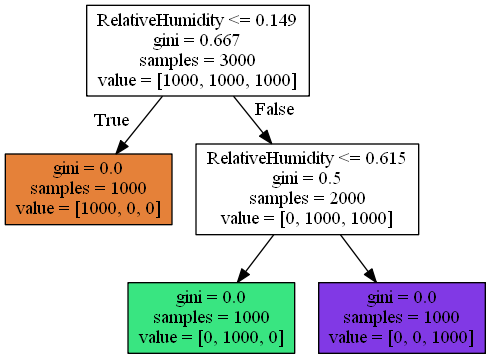

In [17]:
graph = print_tree(dtree_model, features=list(X_train.columns.values))
Image(graph.create_png())

In [21]:
print ('Accuracy :',dtree_model.score(X_test, y_test) )
print('Confusion Matrix:',confusion_matrix(y_test, dtree_predictions))
print('Classification Report:',classification_report(y_test,dtree_predictions))

Accuracy : 0.4528226009148947
Confusion Matrix: [[ 4754  6131  2377]
 [    0 10885  2377]
 [ 2377  8508  2377]]
Classification Report:               precision    recall  f1-score   support

           0       0.67      0.36      0.47     13262
           1       0.43      0.82      0.56     13262
           2       0.33      0.18      0.23     13262

   micro avg       0.45      0.45      0.45     39786
   macro avg       0.48      0.45      0.42     39786
weighted avg       0.48      0.45      0.42     39786



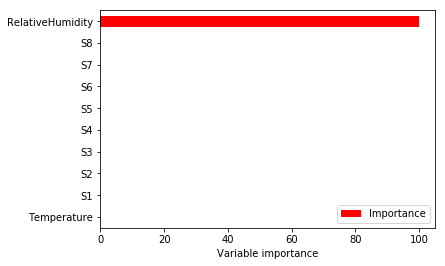

In [22]:
# Variable importance
importance = pd.DataFrame({'Importance':dtree_model.feature_importances_*100}, index=X_train.columns)
importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable importance')
plt.legend(loc='lower right')

# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print (accuracy )
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
print(confusion_matrix(y_test, knn_predictions) )
print(classification_report(y_test, knn_predictions))

0.3530387573518323
[[5216 5669 2377]
 [4986 5899 2377]
 [3249 7082 2931]]
              precision    recall  f1-score   support

           0       0.39      0.39      0.39     13262
           1       0.32      0.44      0.37     13262
           2       0.38      0.22      0.28     13262

   micro avg       0.35      0.35      0.35     39786
   macro avg       0.36      0.35      0.35     39786
weighted avg       0.36      0.35      0.35     39786



# SVM

In [24]:
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix 

#linear kernel
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test) 

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[4941 5944 2377]
 [3684 7201 2377]
 [4225 6660 2377]]
              precision    recall  f1-score   support

           0       0.38      0.37      0.38     13262
           1       0.36      0.54      0.44     13262
           2       0.33      0.18      0.23     13262

   micro avg       0.36      0.36      0.36     39786
   macro avg       0.36      0.36      0.35     39786
weighted avg       0.36      0.36      0.35     39786



In [25]:
#guassian kernel
svclassifier = SVC(kernel='rbf')   
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

C:\Users\MAVERICK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[5078 5807 2377]
 [5313 5572 2377]
 [3479 7228 2555]]
              precision    recall  f1-score   support

           0       0.37      0.38      0.37     13262
           1       0.30      0.42      0.35     13262
           2       0.35      0.19      0.25     13262

   micro avg       0.33      0.33      0.33     39786
   macro avg       0.34      0.33      0.32     39786
weighted avg       0.34      0.33      0.32     39786

